In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
#Read data

realEstateValuation = pd.read_excel('Real estate valuation data set.xlsx')
realEstateValuation

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
#understand the data
realEstateValuation.info()
realEstateValuation.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


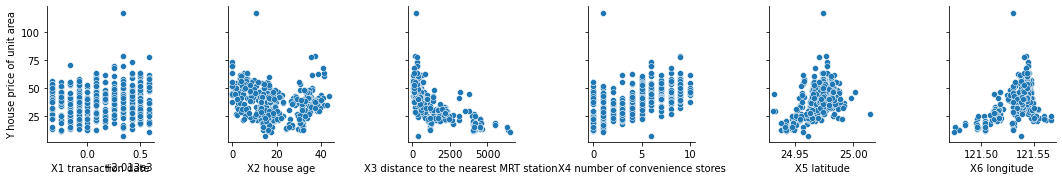

In [6]:
#visualize the data
sns.pairplot(realEstateValuation, x_vars=['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
             y_vars=['Y house price of unit area'])
plt.show()

In [7]:
#X4 seems to be the most correlated to Y, therefore it will be used for this task
#Create X and Y
X = realEstateValuation['X3 distance to the nearest MRT station']
y = realEstateValuation['Y house price of unit area']
#Create train and tests data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)
X_train

287     461.1016
31      769.4034
209     175.6294
239     837.7233
47      640.7391
         ...    
343     563.2854
359    2408.9930
323     197.1338
280     184.3302
8      5512.0380
Name: X3 distance to the nearest MRT station, Length: 289, dtype: float64

In [8]:
y_train

287    32.9
31     25.0
209    40.9
239    29.7
47     61.5
       ... 
343    46.6
359    24.7
323    42.5
280    45.4
8      18.8
Name: Y house price of unit area, Length: 289, dtype: float64

In [9]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [10]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const                                     45.825776
X3 distance to the nearest MRT station    -0.007147
dtype: float64

In [11]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.436
Model:                                    OLS   Adj. R-squared:                  0.434
Method:                         Least Squares   F-statistic:                     221.6
Date:                        Fri, 03 Jun 2022   Prob (F-statistic):           1.57e-37
Time:                                10:36:04   Log-Likelihood:                -1095.6
No. Observations:                         289   AIC:                             2195.
Df Residuals:                             287   BIC:                             2202.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     45.8258      0.838     54.691      0.000      44.177      47.475
X3 distance to the nearest MRT station    -0.0071      0.000    -14.886      0.000      -0.008      -0.006
==============================================================================
Omnibus:                      109.274   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              761.997
Skew:                           1.355   Prob(JB):                    3.42e-166
Kurtosis:                      10.479   Cond. No.                     2.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

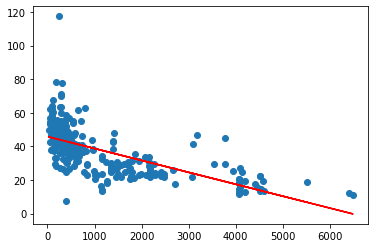

In [12]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 45.8258 - 0.0071*X_train, 'r')
plt.show()

In [13]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred


121    42.307633
353    30.477754
96     45.179256
43     42.160713
125    44.442162
         ...    
248    38.612432
84     43.086341
409    16.650235
80     42.012841
161    41.420154
Length: 125, dtype: float64

In [14]:
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared
# a bit unstable

0.5104359968219091

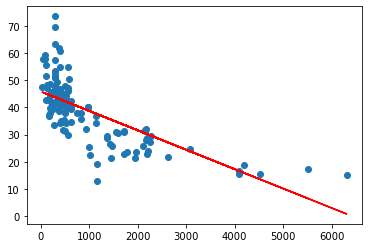

In [15]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [16]:
#clustring

In [17]:
hf = pd.read_csv('heart_failure_clinical_records_dataset.csv')
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [18]:
hf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [19]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


C:\Users\Mustafa\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mustafa\miniconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


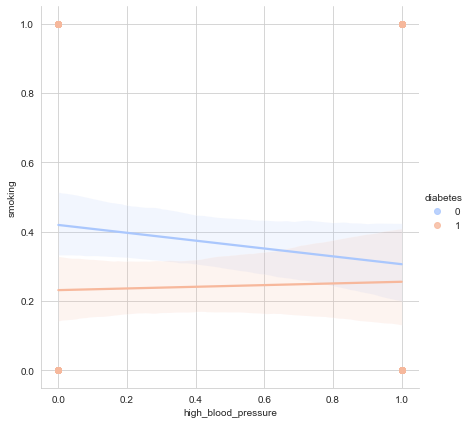

In [20]:
sns.set_style('whitegrid')
sns.lmplot('high_blood_pressure','smoking',data=hf, hue='diabetes',
           palette='coolwarm',size=6,aspect=1,fit_reg=True)

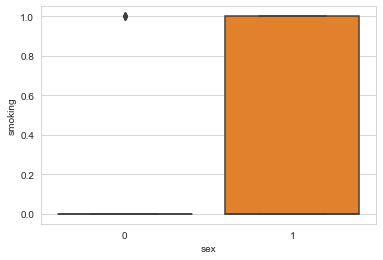

In [21]:

sns.boxplot(x='sex',y='smoking',data=hf)

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,verbose=0,tol=1e-3,max_iter=300,n_init=20)
kmeans.fit(hf.drop('DEATH_EVENT',axis=1))
clus_cent=kmeans.cluster_centers_
clus_cent

array([[6.10883205e+01, 4.23076923e-01, 5.69085470e+02, 4.01709402e-01,
        3.79401709e+01, 3.33333333e-01, 2.26025858e+05, 1.39205128e+00,
        1.36444444e+02, 6.75213675e-01, 3.16239316e-01, 1.30316239e+02],
       [5.99179538e+01, 4.61538462e-01, 6.27753846e+02, 4.76923077e-01,
        3.86000000e+01, 4.15384615e-01, 3.97753846e+05, 1.40046154e+00,
        1.37276923e+02, 5.53846154e-01, 3.38461538e-01, 1.30061538e+02]])

In [23]:
#Classification

# **Supervised Learning - Classification**

In [24]:
from nltk.stem import SnowballStemmer
import re
datasource = {
    'amazon': pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None, names=["text", "label"]),
    'imdb': pd.read_csv('imdb_labelled.txt', delimiter='\t', header=None, names=["text", "label"]),
    'yelp': pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None, names=["text","label"]),

}

datasource["amazon"]["source"] = 'amazon'
datasource["imdb"]["source"] = 'imdb'
datasource["yelp"]["source"] = 'yelp'

data = pd.concat(list(datasource.values()))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2748 non-null   object
 1   label   2748 non-null   int64 
 2   source  2748 non-null   object
dtypes: int64(1), object(2)
memory usage: 85.9+ KB


In [25]:
data.describe()

,label
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [26]:
data.head()

,text,label,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon


In [27]:
X = data['text'].values
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
stemmer=SnowballStemmer('english')
def custom_preprocessor(text):

    text=text.lower()
    text=re.sub("\\W"," ",text) # remove special chars
    text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text) # normalize certain words

    # stem words
    words=re.split("\\s+",text)
    stemmed_words=[stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)


def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems

vectorizer = CountVectorizer(binary=True, preprocessor=custom_preprocessor) # because frequence of occurrence doesn't matter
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

train_sentences = np.array(X_train)
train_labels = np.array(y_train)

In [28]:
model = RandomForestClassifier(
    random_state=1 # set seed to be reproducible
)
model.fit(X_train.toarray(), y_train)
score = model.score(X_test.toarray(), y_test)
print('accuracy: {:.2f}%'.format((score*100)))

model = RandomForestClassifier(
    random_state=1,
    n_estimators=2000,
    max_depth=70,
    max_features='log2',
    bootstrap=False
)
model.fit(X_train.toarray(), y_train)
score = model.score(X_test.toarray(), y_test)
print('accuracy: {:.2f}%'.format((score*100)))


accuracy: 79.62%
accuracy: 80.06%


In [29]:
#Examples:
custom_input = "that was bad "
desc = vectorizer.transform([custom_input])
result = model.predict(desc)[0]
print('positive' if result else 'negative')

custom_input2 = "I am happy with the service"
desc2 = vectorizer.transform([custom_input2])
result2 = model.predict(desc2)[0]
print('positive' if result2 else 'negative')

negative
positive
